In [2]:
"""
Data Set Information:
LIMIT_BAL: Amount of credit given (in New Taiwan dollars) including both the individual consumer credit and supplemental credit for family.
SEX: Gender (1 = male; 2 = female). 
EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = other). 
MARRIAGE:(1 = married; 2 = single; 3 = others). 
AGE: Age (year). 
PAY_0 - PAY_6: History of past payment. 0 = the repayment status in September, 2005; 1 = the repayment status in August, 2005; . . .; 6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
BILL_AMT1-BILL_AMT6: Amount of bill statement (in New Taiwan dollars). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
PAY_AMT1-PAY_AMT6: Amount of previous payment (in New Taiwan dollars).
default payment next month: positive class: default | negative class: pay
"""


'\nData Set Information:\nLIMIT_BAL: Amount of credit given (in New Taiwan dollars) including both the individual consumer credit and supplemental credit for family.\nSEX: Gender (1 = male; 2 = female). \nEDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = other). \nMARRIAGE:(1 = married; 2 = single; 3 = others). \nAGE: Age (year). \nPAY_0 - PAY_6: History of past payment. 0 = the repayment status in September, 2005; 1 = the repayment status in August, 2005; . . .; 6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.\nBILL_AMT1-BILL_AMT6: Amount of bill statement (in New Taiwan dollars). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. \nPAY_AMT1-PAY_

In [3]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
default = pd.read_csv('credit_card_default.csv')

default.rename(columns=lambda x: x.lower(), inplace=True)

In [5]:
# Base values: female, other_education, not_married
default['grad_school'] = (default['education'] == 1).astype('int')
default['university'] = (default['education'] == 2).astype('int')
default['high_school'] = (default['education'] == 3).astype('int')
default.drop('education', axis=1, inplace=True)

default['male'] = (default['sex']==1).astype('int')
default.drop('sex', axis=1, inplace=True)

default['married'] = (default['marriage'] == 1).astype('int')
default.drop('marriage', axis=1, inplace=True)

# For pay features if the <= 0 then it means it was not delayed
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    default.loc[default[p]<=0, p] = 0

default.rename(columns={'default payment next month':'default'}, inplace=True) 

In [6]:
#Building the Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [7]:
target_name = 'default'
X = default.drop('default', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [8]:
def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [9]:
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                      columns=['NULL','LogisticReg'])

In [10]:
"""Accuracy: the proportion of the total number of predictions that are correct
Precision: the proportion of positive predictions that are actually correct
Recall: the proportion of positive observed values correctly predicted as such

Ex: Suppose a computer program for recognizing dogs in photographs identifies 8 dogs in a picture containing 12 dogs and some cats. Of the 8 identified as dogs, 5 actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12.
In this application:

Accuracy: Overall how often the model predicts correctly defaulters and non-defaulters
Precision: When the model predicts default: how often is correct?
Recall: The proportion of actual defalters that the model will correctly predict as such

Which metric should I use?
False Positive: A person who will pay predicted as defaulter
False Negative: A person who defaults but was predicted to be a payer
False negatives are worse => look for a better recall
"""


"Accuracy: the proportion of the total number of predictions that are correct\nPrecision: the proportion of positive predictions that are actually correct\nRecall: the proportion of positive observed values correctly predicted as such\n\nEx: Suppose a computer program for recognizing dogs in photographs identifies 8 dogs in a picture containing 12 dogs and some cats. Of the 8 identified as dogs, 5 actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12.\nIn this application:\n\nAccuracy: Overall how often the model predicts correctly defaulters and non-defaulters\nPrecision: When the model predicts default: how often is correct?\nRecall: The proportion of actual defalters that the model will correctly predict as such\n\nWhich metric should I use?\nFalse Positive: A person who will pay predicted as defaulter\nFalse Negative: A person who defaults but was predicted to be a payer\nFalse negatives are worse => l

In [11]:
#the null model

y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

C:\Users\aram.hovasapyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


PREDICTION,pay,default,Total
TRUE,,,
pay,4673,0,4673
default,1327,0,1327
Total,6000,0,6000


In [12]:
#Logistic regression

# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

C:\Users\aram.hovasapyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


PREDICTION,pay,default,Total
TRUE,,,
pay,4480,193,4673
default,894,433,1327
Total,5374,626,6000


In [13]:
#Making prediction

def make_ind_prediction(new_data):
    data = new_data.values.reshape(1, -1)
    data = robust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will default'
    else:
        return 'Will pay'

In [14]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal', 4200),('age', 51 ),('bill_amt1', 500),
                            ('bill_amt2', 36000 ),('bill_amt3', 700 ),('bill_amt4', 0 ),
                            ('bill_amt5', 0 ),('bill_amt6', 0 ), ('pay_amt1', 0 ),('pay_amt2', 36000 ),
                            ('pay_amt3', 0 ),('pay_amt4', 0 ),('pay_amt5', 0 ), ('pay_amt6', 0 ),
                            ('male', 1 ),('grad_school', 0 ),('university', 1 ), ('high_school', 0 ),
                            ('married', 1 ),('pay_0', -1 ),('pay_2', -1 ),('pay_3', -1 ),
                            ('pay_4', 0),('pay_5', -1), ('pay_6', 0)])

new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

'Will default'

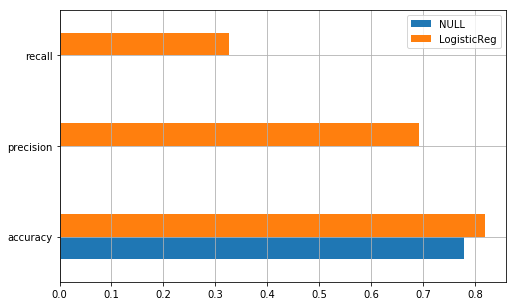

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [16]:
#K nearest neighbors


from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=17)  
classifier.fit(X_train, y_train) 


y_pred = classifier.predict(X_test)  


from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[4441  232]
 [ 879  448]]
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      4673
          1       0.66      0.34      0.45      1327

avg / total       0.80      0.81      0.79      6000



In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

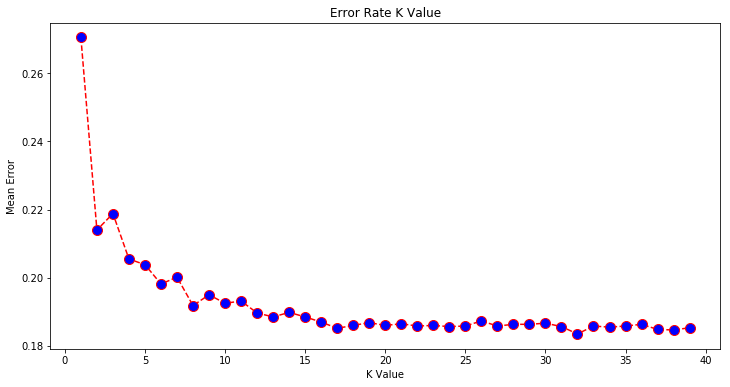

In [18]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 